<h1 align="center"><font color="#000066" size="6">Investigation of the Titanic dataset</font></h1> 

# Data Discovery

In [2]:
import pandas as pd

# import titanic data from csv file 
titanic_data = pd.read_csv('titanic_data.csv')

# Show the first rows of the table
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [3]:
# Show basic info about the titanic data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


# Statistical Test Formulation

I'm interested to know if members of different Pclass have different chance to survive. in other word I want to know if the *Pclass* variable and the *Survived* variable are independent. I'm also interested in knowing if people of different sex have different chance to survive. (*Sex* variable and *Survived* variable are indepedent)

To reach a conclusion I will perform twice the same test. The first time with the *Survived* variable as the dependant variable and the second time with the *Sex* variable as the dependant variable. For both test the independent variable is the *Pclass* variable. 

The variables affected in this test are categorical variables and we are comparing proportions so a suited statistical test for this task is a chi-squared test.

**Null hypothesis :** The survival rate is independent of the class (of the sex for the second test). In proportion the number of people who survived is equivalent for each class (for each sex). p1 = p2 = p3 where p1, p2, p3 represent the proportions respectively for the class 1, 2 and 3. (p4 = p5 where p4, p5 represent the the proportions respectively for the male and female)

**Alternative hypothesis :** The survival rate is dependent of the class (of the sex). In proportion the number of people who survived is different between class (between the two sex). p1 &ne; p2 &ne; p3 (p4 &ne; p5)

**Assumption** : 
* Expected proportions are large enough (>5).
* Each observation is independant of others. 

We set the significance level to be 0.1 for both tests. Given that we are considering a chi-squared test we are dealing with a one-sided test.


# Exploratory Data Analysis

Since we are only interested by the *Pclass* variable and the *Survived* variable I first create a second dataframe to keep only these variables. For the rest of the analysis I only consider this dataframe.

From the Data Discovery step we can observe that the two variables don't contain null values so we don't need to perform additional steps to clean the data. 

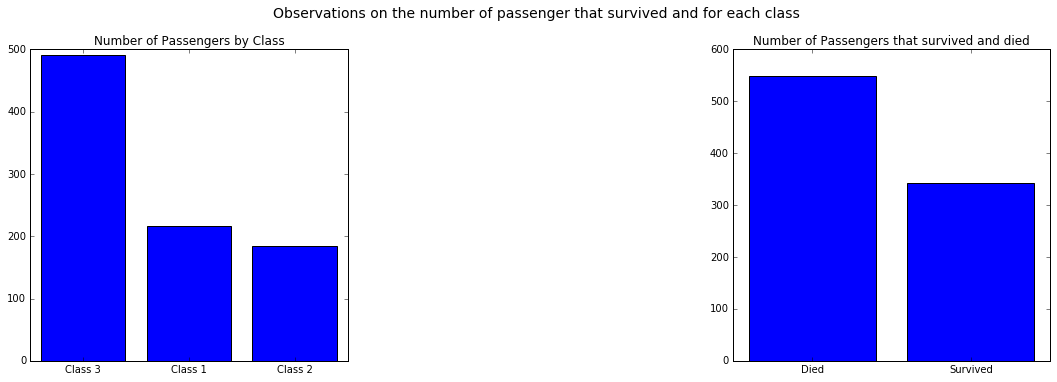

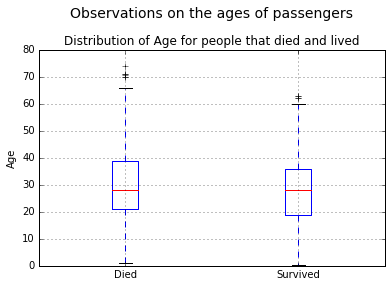

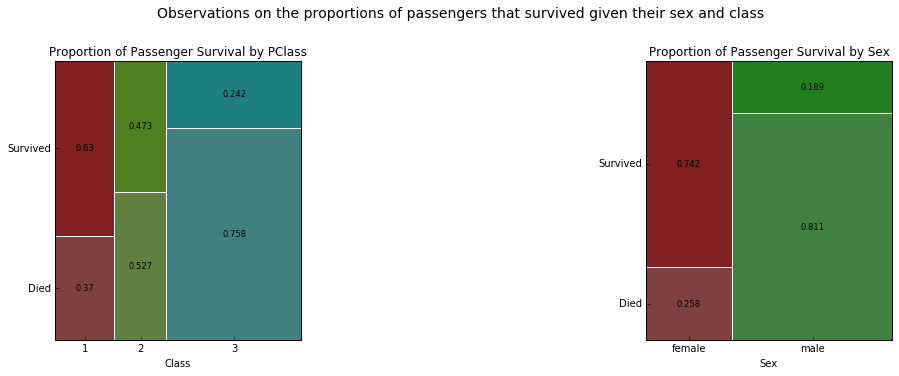

In [45]:
# %pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import numpy as np

# Create a new dataframe with only data used in the rest of the analysis
reduce_titanic_data = pd.DataFrame()
reduce_titanic_data['Survived'] = pd.Series(pd.Categorical.from_codes(titanic_data['Survived'], categories=["Died", "Survived"]))
reduce_titanic_data['Pclass'] = titanic_data['Pclass']
reduce_titanic_data['Age'] = titanic_data['Age']
reduce_titanic_data['Sex'] = titanic_data['Sex']
print('\n')

# Code to display barplot 
fig = plt.figure(figsize=(15,5))

fig.suptitle("Observations on the number of passenger that survived and for each class", fontsize=14, y=1.05)
ax = plt.subplot2grid((1,3), (0,0))
plt.bar(np.unique(reduce_titanic_data['Pclass']), reduce_titanic_data['Pclass'].value_counts(), align='center')
plt.xticks(np.unique(reduce_titanic_data['Pclass']), ['Class 3', 'Class 1', 'Class 2'])
plt.title('Number of Passengers by Class')

ax = plt.subplot2grid((1,3), (0,2))
plt.bar([1,2], reduce_titanic_data['Survived'].value_counts(), align='center')
plt.xticks([1,2], ['Died', 'Survived'])
plt.title('Number of Passengers that survived and died')

plt.tight_layout()
print('\n')


# Code to display boxplot about the distribution of ages
ax = reduce_titanic_data.boxplot('Age', 'Survived')
ax.set_title('Distribution of Age for people that died and lived')
ax.set_ylabel('Age')
ax.set_xlabel('')
fig = ax.get_figure()
fig.suptitle("Observations on the ages of passengers", fontsize=14, y=1.05)
print('\n')

# Compute a cross-tabulation of Survived and Pclass variables
crosstab_class = pd.crosstab(reduce_titanic_data['Survived'], reduce_titanic_data['Pclass'])

# Compute a cross-tabulation of Survived and Sex variables
crosstab_sex = pd.crosstab(reduce_titanic_data['Survived'], reduce_titanic_data['Sex'])

# Code to display mosaic plot 
fig = plt.figure(figsize=(15,5))
fig.suptitle("Observations on the proportions of passengers that survived given their sex and class", fontsize=14, y=1.05)

ax = plt.subplot2grid((1,3), (0,0))
labelizer = lambda k: {('1', 'Died'): round(crosstab_class[1][0]/(crosstab_class[1][0] + crosstab_class[1][1]),3), ('1', 'Survived'): round(crosstab_class[1][1]/(crosstab_class[1][0] + crosstab_class[1][1]),3),
                       ('2', 'Died'): round(crosstab_class[2][0]/(crosstab_class[2][0] + crosstab_class[2][1]),3),('2', 'Survived'): round(crosstab_class[2][1]/(crosstab_class[2][0] + crosstab_class[2][1]),3), 
                       ('3', 'Died'): round(crosstab_class[3][0]/(crosstab_class[3][0] + crosstab_class[3][1]),3), ('3', 'Survived'): round(crosstab_class[3][1]/(crosstab_class[3][0] + crosstab_class[3][1]),3) }[k]
mos1 = mosaic(reduce_titanic_data, ['Pclass', 'Survived'], title='Proportion of Passenger Survival by PClass',
             labelizer=labelizer, ax=ax)
ax.set_xlabel('Class')

ax = plt.subplot2grid((1,3), (0,2))
labelizer = lambda k: {('female', 'Died'): round(crosstab_sex['female'][0]/(crosstab_sex['female'][0] + crosstab_sex['female'][1]),3), ('female', 'Survived'): round(crosstab_sex['female'][1]/(crosstab_sex['female'][0] + crosstab_sex['female'][1]),3),
                       ('male', 'Died'): round(crosstab_sex['male'][0]/(crosstab_sex['male'][0] + crosstab_sex['male'][1]),3),('male', 'Survived'): round(crosstab_sex['male'][1]/(crosstab_sex['male'][0] + crosstab_sex['male'][1]),3)}[k]
mos2 = mosaic(reduce_titanic_data, ['Sex', 'Survived'], title='Proportion of Passenger Survival by Sex',
              labelizer=labelizer, ax=ax)
ax.set_xlabel('Sex')



                                    Contingency Table for the Pclass and Survived variable 

| Class 1  | Class 2 | Class 3 | Total
:-----: | :--------: | :-------: | :-------: | :-----:
**Died**| {{crosstab_class[1][0]}}  | {{crosstab_class[2][0]}} | {{crosstab_class[3][0]}} | {{crosstab_class[1][0] + crosstab_class[2][0] + crosstab_class[3][0]}}
**Survived** | {{crosstab_class[1][1]}}  | {{crosstab_class[2][1]}} | {{crosstab_class[3][1]}} | {{crosstab_class[1][1] + crosstab_class[2][1] + crosstab_class[3][1]}}
**Total** | {{crosstab_class[1][0] + crosstab_class[1][1]}} | {{crosstab_class[2][0] + crosstab_class[2][1]}} | {{crosstab_class[3][0] + crosstab_class[3][1]}} | {{crosstab_class.sum().sum()}}

                                      Contingency Table for the Sex and Survived variable
| Female  | Male | Total
:-----: | :--------: | :-------: | :-----:
**Died**| {{crosstab_sex['female'][0]}}  | {{crosstab_sex['male'][0]}} | {{crosstab_sex['female'][0] + crosstab_sex['male'][0]}}
**Survived** | {{crosstab_sex['female'][1]}}  | {{crosstab_sex['male'][1]}} | {{crosstab_sex['female'][1] + crosstab_sex['male'][1]}}
**Total** | {{crosstab_sex['female'][0] + crosstab_sex['female'][1]}} | {{crosstab_sex['male'][0] + crosstab_sex['male'][1]}} | {{crosstab_class.sum().sum()}}


# Statistical Test 

From the mosaic plots and the contingency tables it would seem that indeed people from different class as well as different sex have diferent chance of survival. Below is the full anlysis :

In [104]:
from scipy.stats import chisquare

# Format class frequencies to be given as input to the chisquare function of the scipy.stats module
class_survived_frequencies = crosstab_class.as_matrix().flatten() / [ crosstab_class[1][0] + crosstab_class[1][1], 
                                                                      crosstab_class[2][0] + crosstab_class[2][1], 
                                                                      crosstab_class[3][0] + crosstab_class[3][1], 
                                                                      crosstab_class[1][0] + crosstab_class[1][1], 
                                                                      crosstab_class[2][0] + crosstab_class[2][1], 
                                                                      crosstab_class[3][0] + crosstab_class[3][1] ]
class_survived_frequencies = class_survived_frequencies * 100

# Compute expected frequencies for the Pclass variable
class_expected_frequencies = np.multiply(np.reshape(np.array([crosstab_class[1][0] + crosstab_class[2][0] + crosstab_class[3][0], crosstab_class[1][1] + crosstab_class[2][1] + crosstab_class[3][1]]), (2,1)), \
                                         np.reshape(np.array([crosstab_class[1][0] + crosstab_class[1][1], crosstab_class[2][0] + crosstab_class[2][1], crosstab_class[3][0] + crosstab_class[3][1]]),(1,3)))
class_expected_frequencies = class_expected_frequencies / crosstab_class.sum().sum()
class_expected_frequencies = class_expected_frequencies.flatten()


# Format sex frequencies to be given as input to the chisquare function of the scipy.stats module
sex_survived_frequencies = crosstab_sex.as_matrix().flatten() / [ crosstab_sex['female'][0] + crosstab_sex['female'][1], 
                                                                  crosstab_sex['male'][0] + crosstab_sex['male'][1], 
                                                                  crosstab_sex['female'][0] + crosstab_sex['female'][1], 
                                                                  crosstab_sex['male'][0] + crosstab_sex['male'][1] ]

sex_survived_frequencies = sex_survived_frequencies * 100

# Compute expected frequencies for the sex variable
sex_expected_frequencies = np.multiply(np.reshape(np.array([crosstab_sex['female'][0] + crosstab_sex['male'][0], crosstab_sex['female'][1] + crosstab_sex['male'][1] ]), (2,1)), \
                                         np.reshape(np.array([crosstab_sex['female'][0] + crosstab_sex['female'][1], crosstab_sex['male'][0] + crosstab_sex['male'][1] ]),(1,2)))
sex_expected_frequencies = sex_expected_frequencies / crosstab_class.sum().sum()
sex_expected_frequencies = sex_expected_frequencies.flatten()


# Compute the t-statistics and the p-values for both tests
chisq_class, p_class  = chisquare(class_survived_frequencies, class_expected_frequencies)
chisq_sex, p_sex  = chisquare(sex_survived_frequencies, sex_expected_frequencies)

T t-statistic found for the test about the Pclas variable is {{ str(round(chisq_class,3))}} and the corresponding p value is {{ p_class }}

T t-statistic found for the test about the Sex variable is {{ str(round(chisq_sex,3))}} and the corresponding p value is {{  p_sex  }}

# Results Interpretation

For the significance level chosen (0.1) and the degree of freedom of our test (2) the critical p value is 0.020. the critical p value was found using [this](http://sites.stat.psu.edu/~mga/401/tables/Chi-square-table.pdf) table. 

We can observe that the p values computed for both test are well below the critical p value so we can reject the null hypothesis in both cases and claim that the *Pclass* variable and the *Survived* variable are dependent as well as the *Sex* variable and the *Survived* variable.

This result confirm my expectation that members of different class are not treated equally as well as people from different sex. Further explorations could investigate what cause this difference especially for members of different class. One explanation could be that the first class has many more female members that the the second and the third class.

# Going further

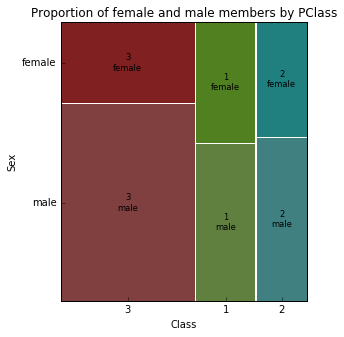

In [65]:
# Compute a cross-tabulation of Survived and Pclass variables
crosstab_class_sex = pd.crosstab(reduce_titanic_data['Survived'], reduce_titanic_data['Pclass'])

fig = plt.figure(figsize=(15,5))
ax = plt.subplot(131)
mos1 = mosaic(reduce_titanic_data, ['Pclass', 'Sex'], title='Proportion of female and male members by PClass', ax=ax)
ax.set_xlabel('Class')
ax.set_ylabel('Sex')

Indeed the first class contain more female members that the other class but not in the same proportions that the rate of survival in this class. Additional factors (social status, children...) might contribute to the gap in proportions between the different class.

# References

* http://sites.stat.psu.edu/~mga/401/tables/Chi-square-table.pdf
* https://en.wikipedia.org/wiki/Chi-squared_test
* http://matplotlib.org/users/gridspec.html
